In [3]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [5]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)

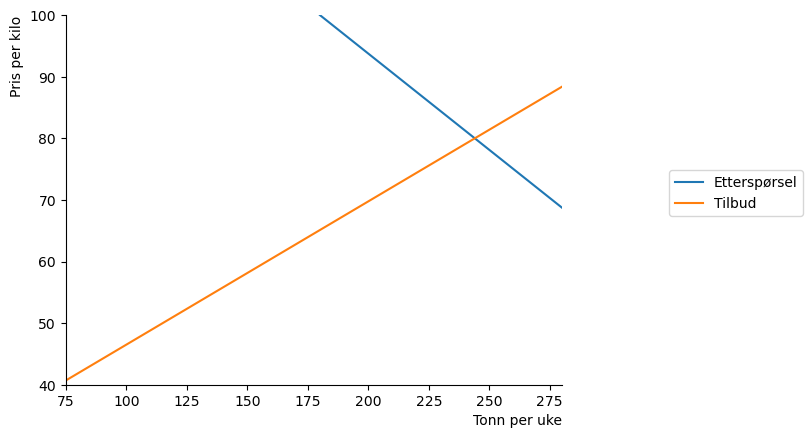

In [32]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 1

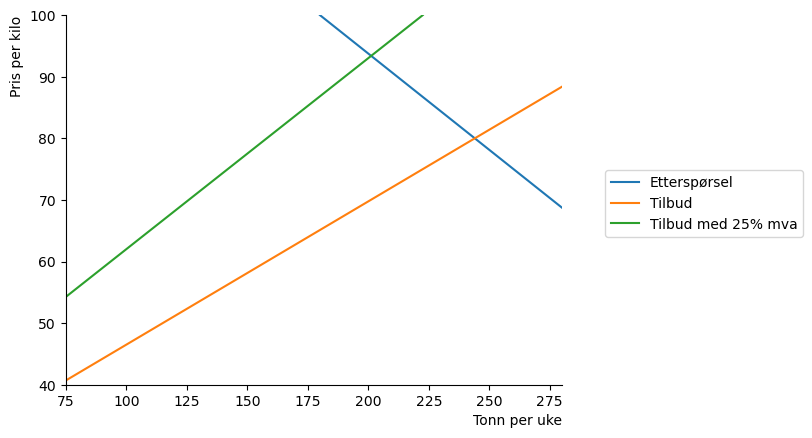

In [33]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')

ax.legend(bbox_to_anchor=(1.5,0.6));

Grafen er brattere ettersom grafen øker med 25% ekstra imotsetning til den uten mva.

Oppgave 2

In [7]:
#Lage en formel for etterspørsel med avgift
def x_dt(p,T):
    return 500 - 3.2*(p+T)

In [8]:
#definer symboler i sympy
x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

#betingelse for likevekt
eq_cond=sp.Eq(x_dt(p,T),x_s(p,t))
eq_cond

Eq(-3.2*T - 3.2*p + 500, 4.3*p*(1 - t) - 100)

In [22]:
#løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

16.0*(2.0*T - 375.0)/(43.0*t - 75.0)

In [26]:
#finn tilsvarende kvantum
x_eq=x_s(p_eq[0],t)
x_eq

68.8*(1 - t)*(2.0*T - 375.0)/(43.0*t - 75.0) - 100

In [23]:
#Likevektspris som funksjon av t og T
p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

(32.0*T - 6000.0)/(43.0*t - 75.0)

In [27]:
#Likevektskvantum som funksjon av t og T
x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

(68.8 - 68.8*t)*(2.0*T - 375.0)/(43.0*t - 75.0) - 100

In [29]:
#funksjon for å finne likevektskvantum med mva
x_eq_fn(0.25,0)

201.1673151750972

In [53]:
#funksjon for å finne likevektskvantum med mva
x_eq_fn(0,0)

244.0

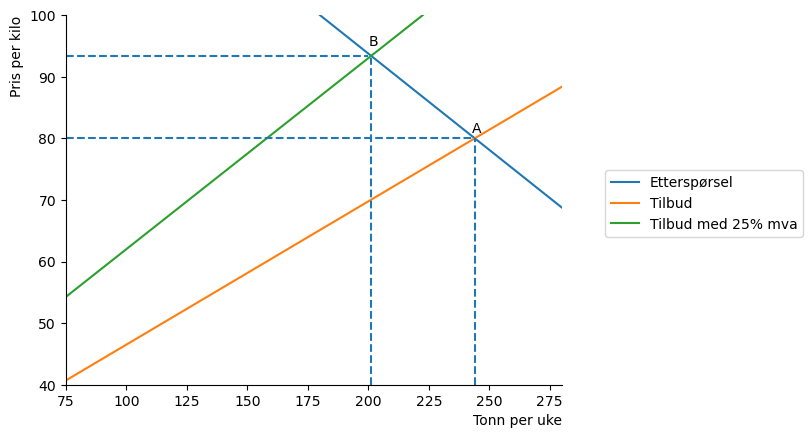

In [63]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')

#Uten mva

ax.text(243, 81, "A")

ax.vlines(x_eq_fn(0,0),40, 80, linestyles='dashed', clip_on=False)
          
ax.hlines(p_eq_fn(0,0),75,244, linestyles='dashed', clip_on=False)

#Med mva

ax.text(200, 95, "B")

ax.vlines(x_eq_fn(0.25,0),40, 93, linestyles='dashed', clip_on=False)

ax.hlines(p_eq_fn(0.25,0),75, 200, linestyles='dashed', clip_on=False)

ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 3

In [64]:
def avgiftprov(t):
    return t*x_eq_fn(t,0)
avgiftprov(t)

t*(-100 + (25800.0*t - 25800.0)/(43.0*t - 75.0))

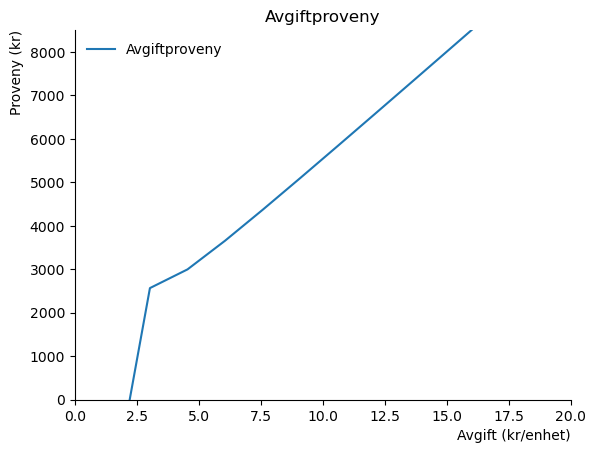

In [69]:
t_num=np.linspace(0,150,100)

fig,ax=plt.subplots()

ax.set_ylabel('Proveny (kr)', loc = 'top')
ax.set_xlabel('Avgift (kr/enhet)', loc= 'right')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(t_num, avgiftprov(t_num),label='Avgiftproveny')



#legend:
ax.legend(loc='best', frameon=False)

#title
ax.set_title ('Avgiftproveny')

ax.set_xlim(0,20)
ax.set_ylim(0,8500);


Oppgave 4

Mva:
Varen blir nødt til å gå opp i pris for å få samme kvantum, derfor synker også etterspørselen til å synke. Varen kan også kostes om varen er dyrere enn produksjonen. Mva fører også til at myndigheten får inntekt.

Stykkprisavgiften:
I motsetningen til faste avgifter kan stykkprisavgift enklere å vende seg etter salg av varen. Stykkprisavgift fører også økning av pris som fører til mindre etterspørsel og tilbuds mengde reduseres. Vi får også et effektivitetstap